In [2]:
#Decision Trees (Karar Ağaçları)
import pandas as pd
dataset = pd.read_csv('/kaggle/input/social-network-ads-csv/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [4]:
#Veriyi Bölme
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
#Standartlaştırma
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion' : ['gini', 'entropy'], #bölünme kriteri
    'max_depth' : [3, 5, 10, 'None'], #maksimum derinlik
    'min_samples_split' : [2, 5, 10], #bir düğümün bölünebilmesi için gereken minimum örnek sayısı
    'min_samples_leaf' : [1, 2, 4], #bir yaprak düğümünde gereken minimum örnek sayısı
    'max_features' : ['None', 'sqrt', 'log2']
}

In [11]:
dt = DecisionTreeClassifier(random_state = 0)

grid_search = GridSearchCV(dt, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk oranı:", grid_search.best_score_)

En iyi parametreler: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
En iyi doğruluk oranı: 0.8933333333333333


In [14]:
#RandomizedSearchCV ile DT Hiperparametre Optimizasyonu - rastgele bir alt küme denemesi yapılır. 
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'criterion' : ['gini', 'entropy'], #bölünme kriteri
    'max_depth' : [None] + list(np.arange(3, 21, 3)), #None veya 3-21 arası derinlik
    'min_samples_split' : np.arange(2, 21, 2), #2-20 arasındaki çift sayılar
    'min_samples_leaf' : np.arange(1,11), #1-10 arasındaki tüm değerler
    'max_features' : ['None', 'sqrt', 'log2'] 
}

dt = DecisionTreeClassifier(random_state = 0)

random_search = RandomizedSearchCV(
    dt, param_distributions = param_dist, 
    n_iter = 20, #rastgele 20 farklı parametre kombinasyonu denenecek
    cv = 5, scoring = 'accuracy', n_jobs = -1, random_state = 42)

random_search.fit(X_train, y_train)

print("En iyi parametreler:", random_search.best_params_)
print("En iyi doğruluk oranı:", random_search.best_score_)

En iyi parametreler: {'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 3, 'criterion': 'gini'}
En iyi doğruluk oranı: 0.8933333333333332


In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=4)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 2 30]]


In [19]:
import matplotlib.pyplot as plt

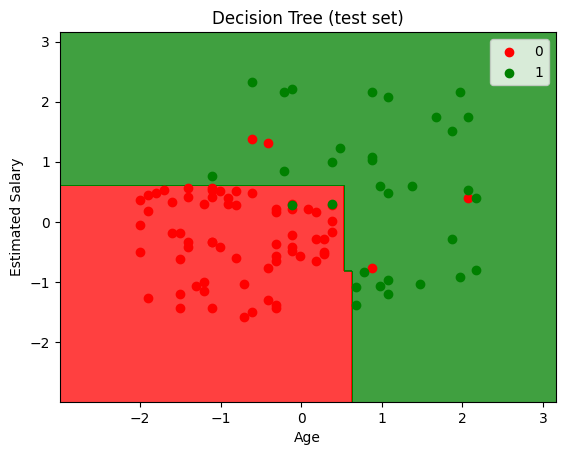

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Decision Tree (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

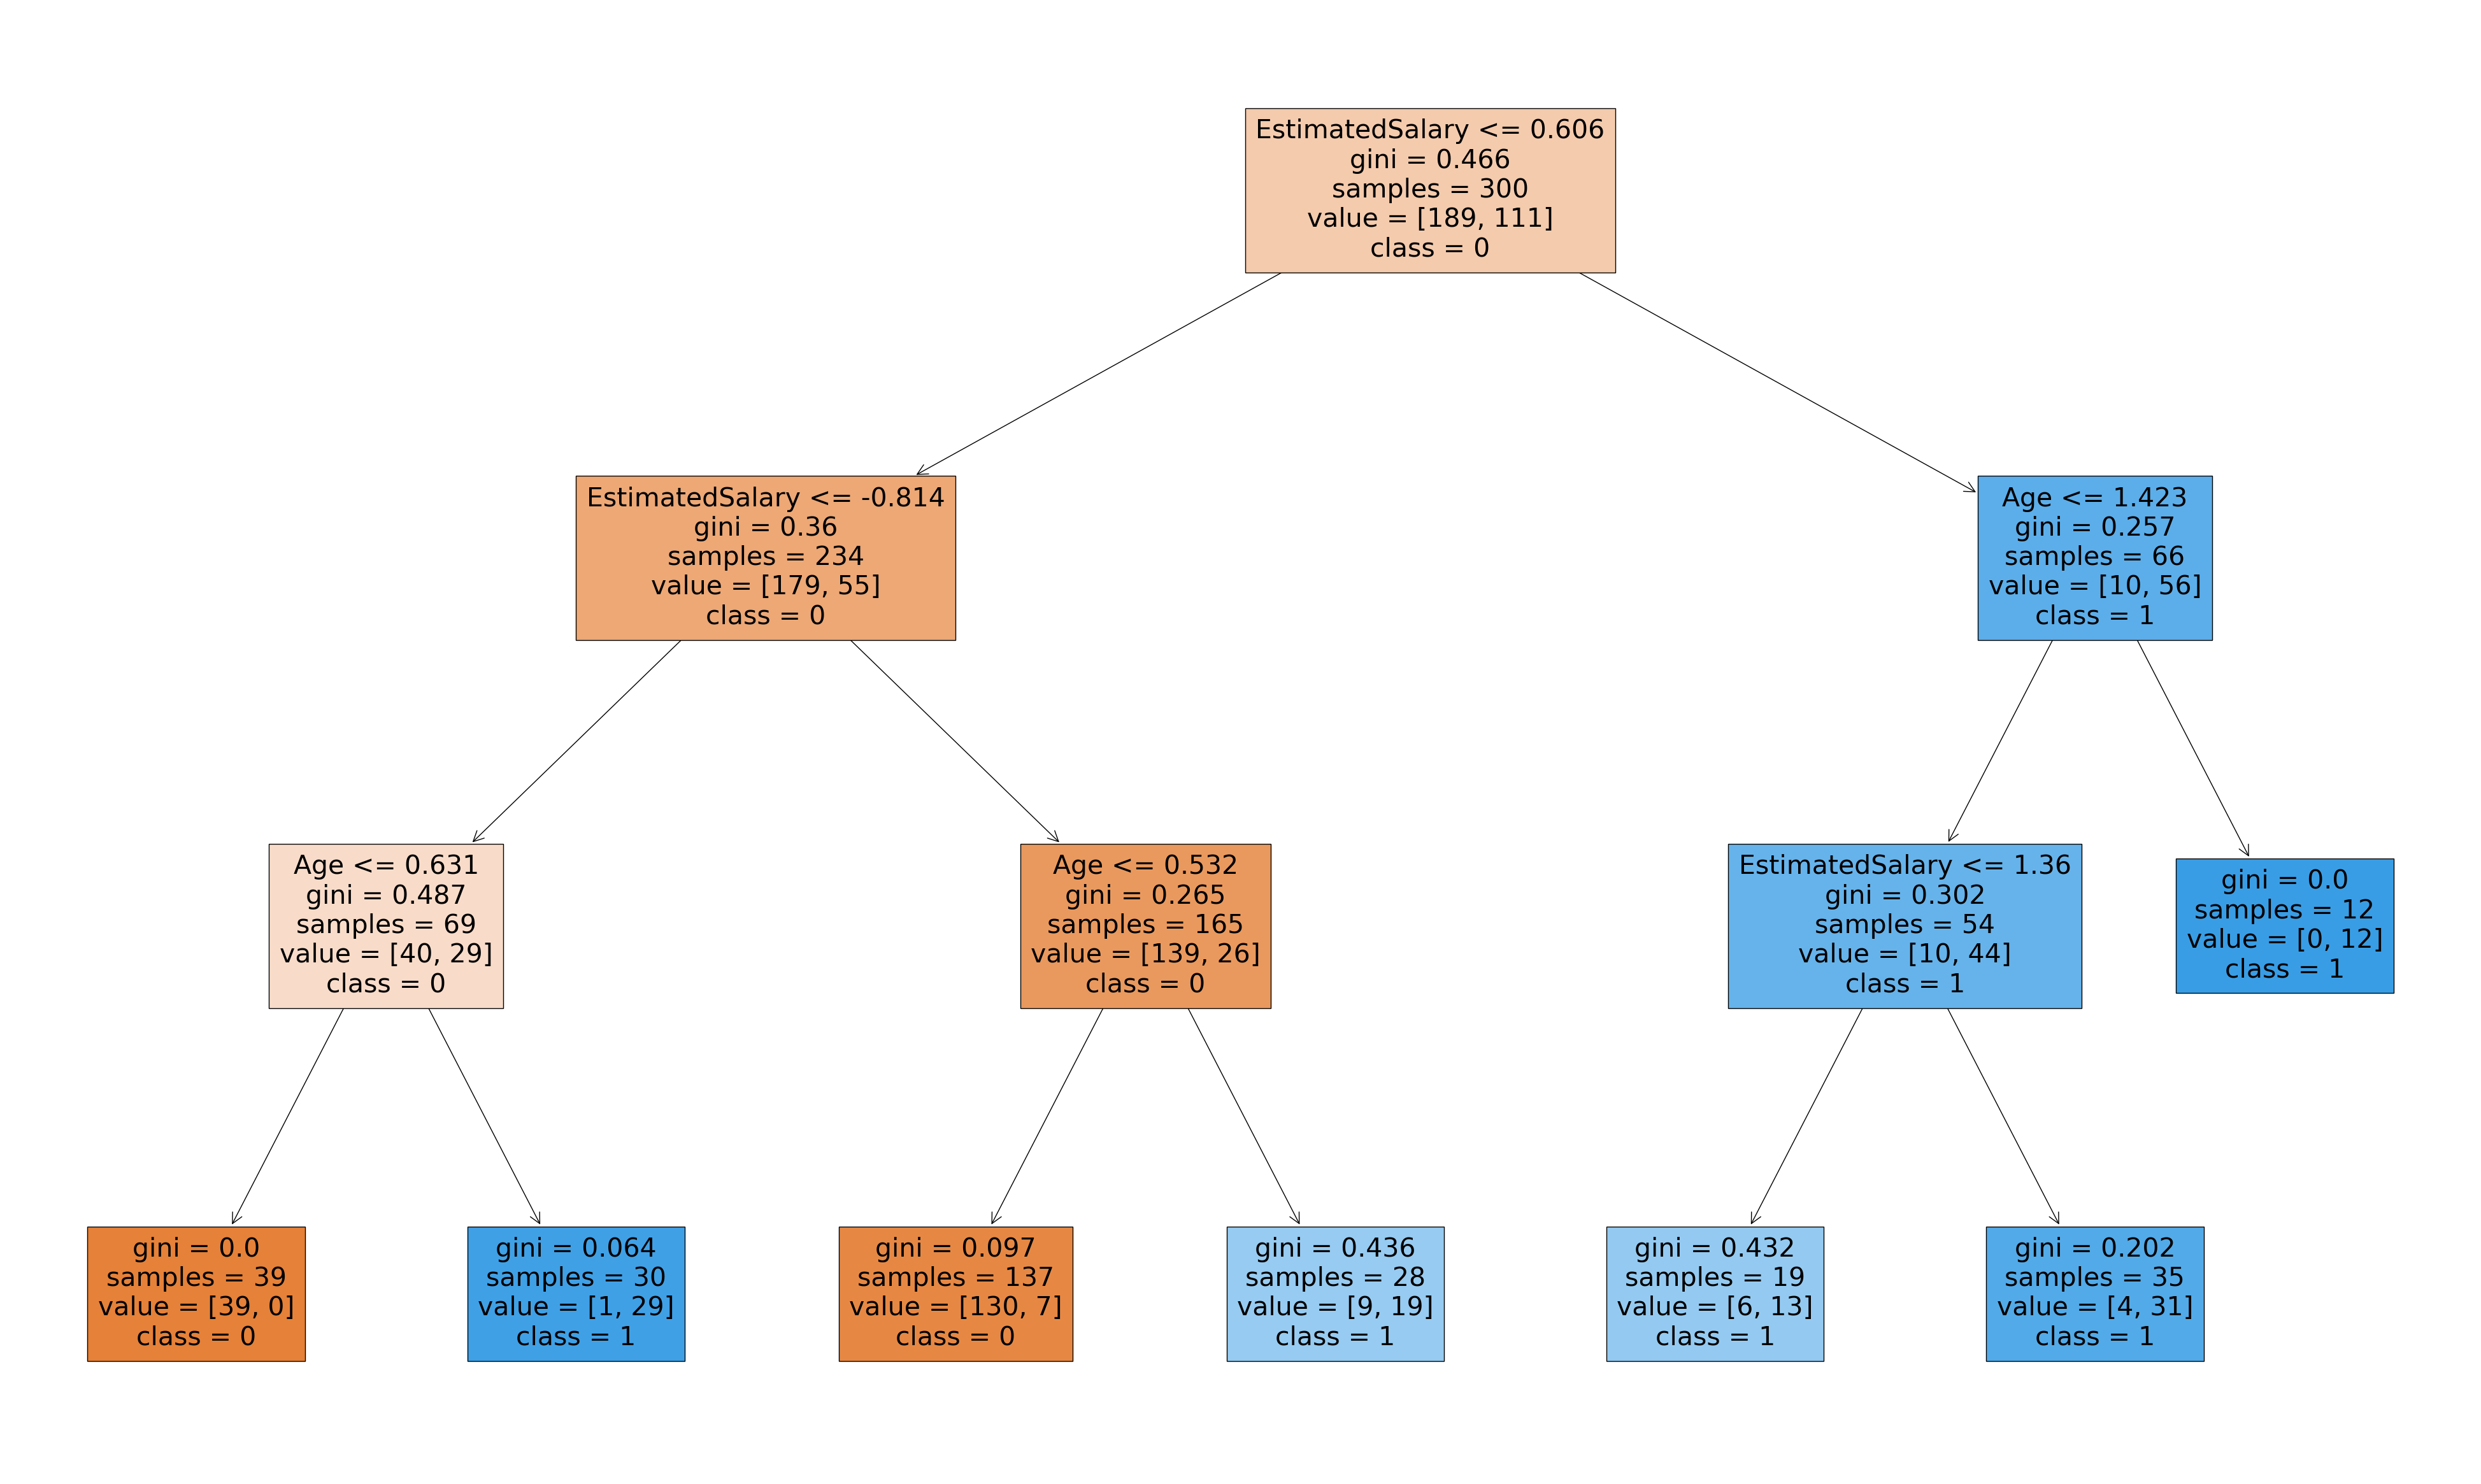

In [21]:
from sklearn import tree
fn = ['Age', 'EstimatedSalary']
cn = ['0', '1']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (50, 30))
tree.plot_tree(classifier, feature_names = fn, class_names = cn, filled = True)
fig.savefig('1103AcunMedyaAI.png')

In [22]:
#logistic regression
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
X = dataset.drop(['Purchased', 'User ID', 'Gender'], axis = 1)
y = dataset['Purchased']
X.shape, y.shape

((400, 2), (400,))

In [24]:
#Veriyi Bölme
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [25]:
#Standartlaştırma
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
"""
C değeri küçükse -> daha basit model, overfitting önlenir, regul. artar. 
C değeri büyükse -> model daha esnek olur, daha fazla öğrenir. overfitting tehdidi de artar. 
Veri küçükse (az örnek varsa) -> küçük C
Veri büyükse (çok örnek varsa) -> büyük C
overfitting varsa -> küçük C
underfitting (az öğrenme) varsa -> büyük C 
"""

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(X_train, y_train)

print("En iyi C değeri:", grid.best_params_)

En iyi C değeri: {'C': 1}


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 1.0)
classifier.fit(X_train, y_train)
#Regularization (Düzenlileştirme)
"""
Overfitting engelleyici. Regul. sayesinde modelin ağırlıklarını (coef, weight) küçülterek gereksiz karmaşayı önleriz. 
L2 Regul. (Ridge Regression - Tikhonov Regul.) -> weight'in karesini minimize ediyoruz. lambda katsayısı da regul. gücünü belirliyor. 
Logistic reg. default modeldir. 
L1 Regul. (Lasso Regression) -> gereksiz değişkenleri sıfıra çekerek, feature selection kolaylaştırılır. penalty = 'l1'
"""

In [31]:
y_predictions = classifier.predict(X_test)

In [32]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Purchased', 'Predicted Purchased'])
hesaplama

,Original Purchased,Predicted Purchased
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,1
96,0,0
97,1,1
98,1,1


In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predictions)
print(cm)

[[64  4]
 [ 2 30]]


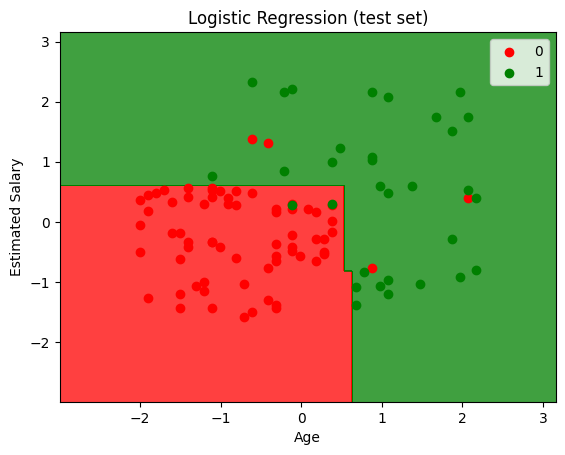

In [34]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [35]:
#Unsupervised Learning (Main concept: Clustering)
"""
1- Sahte Haber Tespiti
2- Spam e-mail filter
3- Satış - Pazarlama
4- Ağ trafiği kümeleme
5- Sahtecilik veya suç içeren aktiviteleri bulma
6- Deprem çalışmaları
"""

'\n1- Sahte Haber Tespiti\n2- Spam e-mail filter\n3- Satış - Pazarlama\n4- Ağ trafiği kümeleme\n5- Sahtecilik veya suç içeren aktiviteleri bulma\n6- Deprem çalışmaları\n'

In [36]:
#K-Means (Centroid-Based Clustering)
dataset = pd.read_csv('/kaggle/input/mall-customers-csv/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
